In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import make_classification

In [42]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [43]:
X

array([[ 1.27391014,  0.61735621],
       [ 0.73583844, -1.07936745],
       [ 0.08868765, -0.12419002],
       ...,
       [ 0.20829364,  0.47844434],
       [-0.49922734, -0.86606643],
       [-0.23231797, -0.93992745]])

In [44]:
pd.DataFrame(X)[0]

0      1.273910
1      0.735838
2      0.088688
3     -1.785107
4      1.734885
         ...   
995   -0.808961
996   -0.774121
997    0.208294
998   -0.499227
999   -0.232318
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

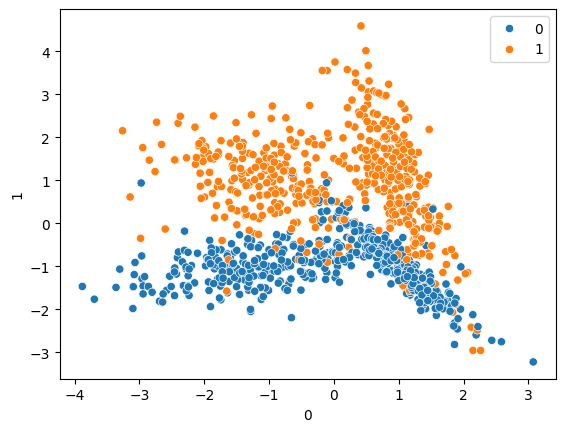

In [45]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)


In [47]:
from sklearn.svm import SVC

In [48]:
svc=SVC(kernel='linear')

In [49]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [50]:
y_pred=svc.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       136
           1       0.94      0.90      0.92       114

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[129   7]
 [ 11 103]]


In [53]:
rbf=SVC(kernel='rbf')

In [54]:
rbf.fit(X_train,y_train)

SVC()

In [55]:
y_pred=rbf.predict(X_test)

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [60]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5,verbose=3,refit=True)

In [61]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.927 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.860 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [62]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [63]:
y_pred=grid.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       136
           1       0.94      0.90      0.92       114

    accuracy                           0.93       250
   macro avg       0.93      0.93      0.93       250
weighted avg       0.93      0.93      0.93       250

[[129   7]
 [ 11 103]]
